In [109]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [110]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [111]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [112]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [113]:
# reflect an existing database into a new model
Base= automap_base()

# reflect the tables
Base.prepare(engine, reflect =True)

In [114]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [115]:
# Save references to each table
measurement=Base.classes.measurement
station= Base.classes.station

In [125]:
# Create our session (link) from Python to the DB
session= Session(engine)
conn=engine.connect()

# Exploratory Precipitation Analysis

In [117]:
# Find the most recent date in the data set.
from sqlalchemy import desc
recent_date=session.query(measurement.date).order_by(desc(measurement.date)).first()
print(recent_date)


('2017-08-23',)


One year ago from most recent date: 2016-08-23


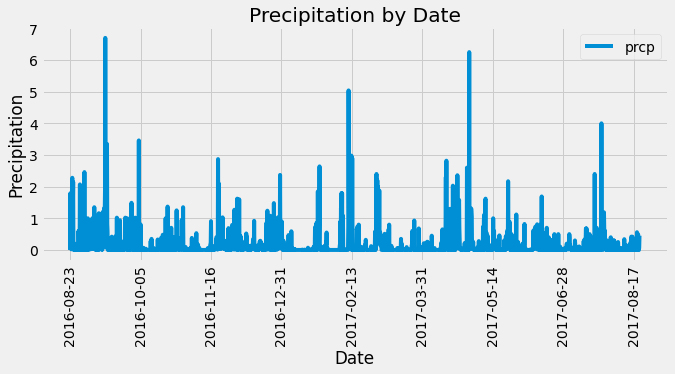

In [118]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago= dt.date(2017,8,23)- dt.timedelta(days=365)
print("One year ago from most recent date:", one_year_ago)

# Perform a query to retrieve the date and precipitation scores

precipitation_scores= session.query(measurement.date, measurement.prcp).filter\
(measurement.date >= '2016-08-23').filter(measurement.date <= '2017-08-23').all()


# Save the query results as a Pandas DataFrame and set the index to the date column
first_df= pd.DataFrame(precipitation_scores,columns=['date','prcp']).set_index('date')

# Sort the dataframe by date
sorted_df= first_df.sort_values(by='date',ascending=True).dropna()
sorted_df.head()
# Use Pandas Plotting with Matplotlib to plot the data
sorted
sorted_df.plot(figsize=(10,4),rot=90)
plt.title('Precipitation by Date')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.savefig("Images/precipitation_by_date.png")
plt.show()

In [119]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sorted_df.describe()


,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [120]:
# Design a query to calculate the total number stations in the dataset
total_stations= session.query(station).distinct().count()
print(total_stations)

9


In [121]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_station=session.query (measurement.station,func.count(measurement.station)).group_by(measurement.station).\
order_by(func.count(measurement.station).desc()).all()
active_station


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [122]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

most_active= 'USC00519281'
temp_calculations= session.query(func.min(measurement.tobs),\
                                 func.max(measurement.tobs),\
                                 func.avg(measurement.tobs)).filter(measurement.station == most_active).all()
temp_calculations

[(54.0, 85.0, 71.66378066378067)]

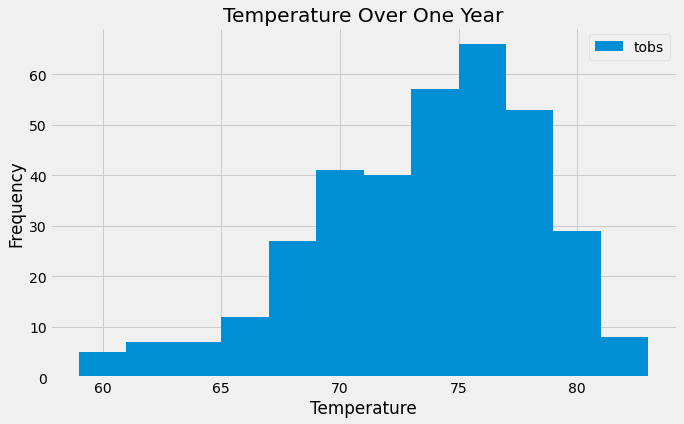

In [123]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
obser_data= session.query(measurement.date, measurement.tobs).filter\
(measurement.date >= '2016-08-23').filter(measurement.date <= '2017-08-23').filter\
(measurement.station == most_active).all()
last_df= pd.DataFrame(obser_data)
last_df.plot(kind="hist",bins=12,density=False,figsize=(10,6))
plt.legend(['tobs'])
plt.xlabel('Temperature')
plt.title('Temperature Over One Year')

plt.savefig("Images/USC00519281_Obser_data_hist.png")
plt.show()

# Close session

In [124]:
# Close Session
session.close()